In [1]:
#Step 1: Read Annotated Phage Data
import pandas as pd
import scipy
import numpy as np 

valids = pd.read_csv("AnnotatedPhageList.csv")
valids.dropna(subset=["Head Length","Head Width","Tail Length"], how='all', inplace=True)

In [2]:
#Step 2: Process Phage Data (Make Sizes Readable to computer and compute average radius)

def remove_nm(x):
    return int(x["Head Length"].strip("nm")), int(x["Head Width"].strip("nm")),int(x["Tail Length"].strip("nm"))
new = valids.apply(lambda x: remove_nm(x), axis = 1)



valids[["Head Length","Head Width","Tail Length"]] = pd.DataFrame(new.tolist(), columns = ["Head Length","Head Width","Tail Length"])




valids["Circumsphere radius"] = valids[["Head Length","Head Width"]].mean(axis = 1)/2



In [3]:
#Compute phage volume from radius
import math

def get_vol(x):
    rad = x["Circumsphere radius"]
    edge = 4*rad/(3.804226065180614)
    volume = (edge**3) * (3+math.sqrt(5)) * 5/12
    return volume
valids["volume"] = valids.apply(lambda x: get_vol(x), axis = 1)



Text(0.5, 0, 'Computed Phage Capsid Volume ($nm^3$) ($log_{10}$ scale)')

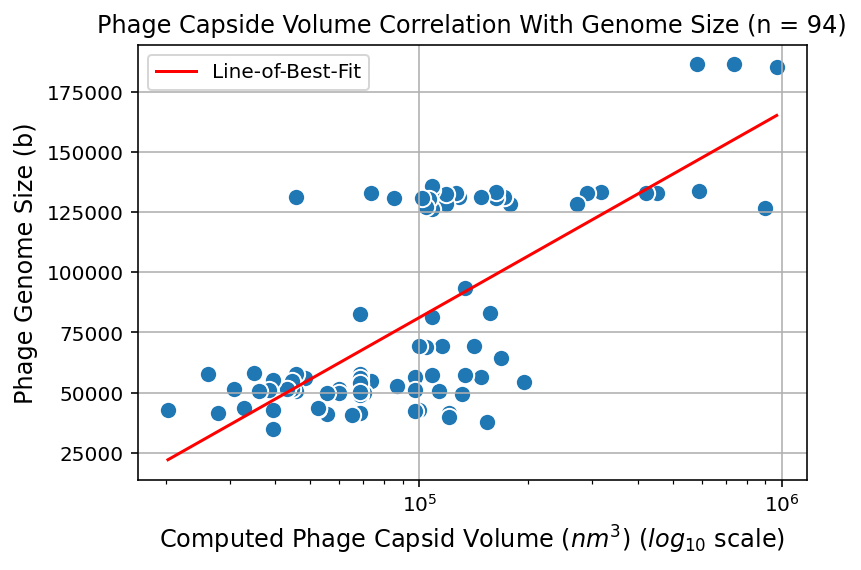

In [4]:
#See corerlation between phage volume and genome size

import seaborn as sns 
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

valids = valids.sort_values(by='volume', ascending=False)
plt.xscale('log')

p = np.polyfit(np.log10(valids["volume"]),valids["Genome Size"], 1)
y_fit = (np.polyval(p, np.log10(valids["volume"])))
plt.plot(valids["volume"], y_fit, 'r-', label = "Line-of-Best-Fit")

plt.grid()

plt.scatter(valids["volume"], valids["Genome Size"],edgecolors='w', s= 75)
plt.legend()
plt.title('Phage Capside Volume Correlation With Genome Size (n = 94)', fontsize=12)

plt.ylabel('Phage Genome Size (b)', fontsize=12)

plt.xlabel('Computed Phage Capsid Volume ($nm^3$) ($log_{10}$ scale)', fontsize=12)


In [5]:
#Find Coefficents of Line of Best Fit

a, b = np.polyfit(np.log10(valids["volume"]),valids["Genome Size"], 1)


a, b

(85294.40858388475, -345328.75960523175)

In [6]:
#Verify that volume is the most correlated variable by computing correlation coefficents 

import scipy
import numpy as np

array = []
error = []

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(np.log10(valids["Head Length"]), valids["Genome Size"])
array.append(r_value)

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(np.log10(valids["Head Width"]), valids["Genome Size"])
array.append(r_value)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(np.log10(valids["Tail Length"]), valids["Genome Size"])
array.append(r_value)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(np.log10(valids["volume"]), valids["Genome Size"])
array.append(r_value)


Text(0.5, 0, 'Phage Morphology Characteristics')

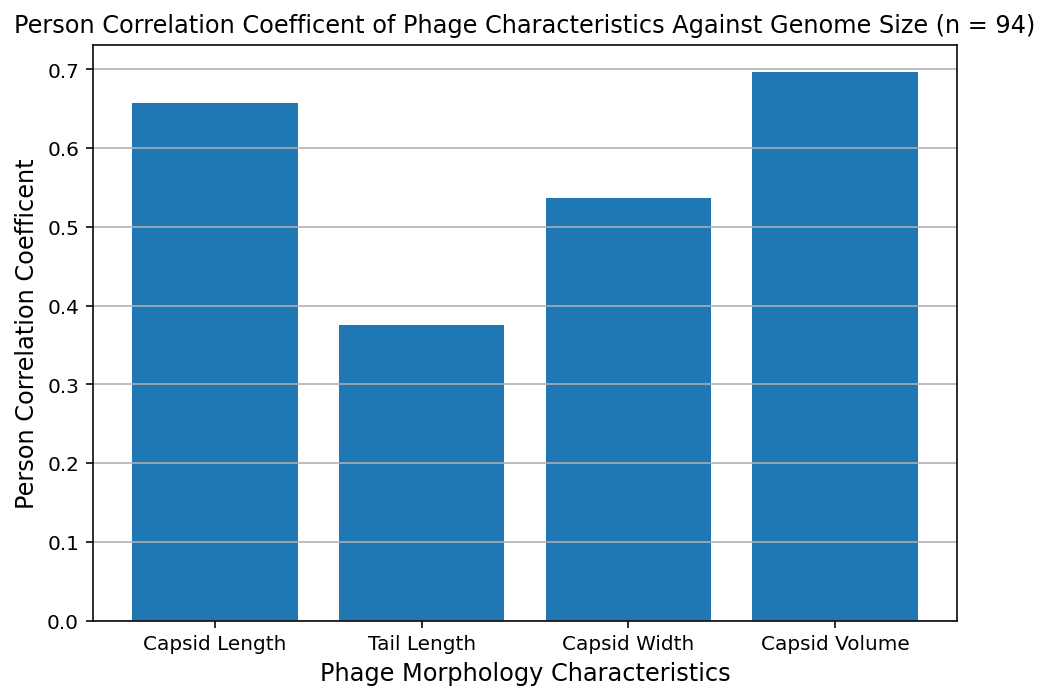

In [7]:
#Visualizing Correlation Coefficents

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(['Capsid Length', "Tail Length", "Capsid Width", "Capsid Volume"] ,array)
plt.grid(axis='y')

plt.title('Person Correlation Coefficent of Phage Characteristics Against Genome Size (n = 94)', fontsize=12)

plt.ylabel('Person Correlation Coefficent', fontsize=12)

plt.xlabel('Phage Morphology Characteristics', fontsize=12)

In [8]:
#Look at how this compares to estimates made using Restriction Digest Gel

gel_preds = valids.dropna(subset=["Gel Estimation"], how='all')
def remove_kb(x):
    return float(x["Gel Estimation"].strip("kb"))*1000
gel_preds["Gel Estimation"]  = gel_preds.apply(lambda x: remove_kb(x), axis = 1)
len(gel_preds)

<ipython-input-8-d07cf29f68c3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gel_preds["Gel Estimation"]  = gel_preds.apply(lambda x: remove_kb(x), axis = 1)


12

Text(0.5, 0, 'Predicted Genome Size (b)')

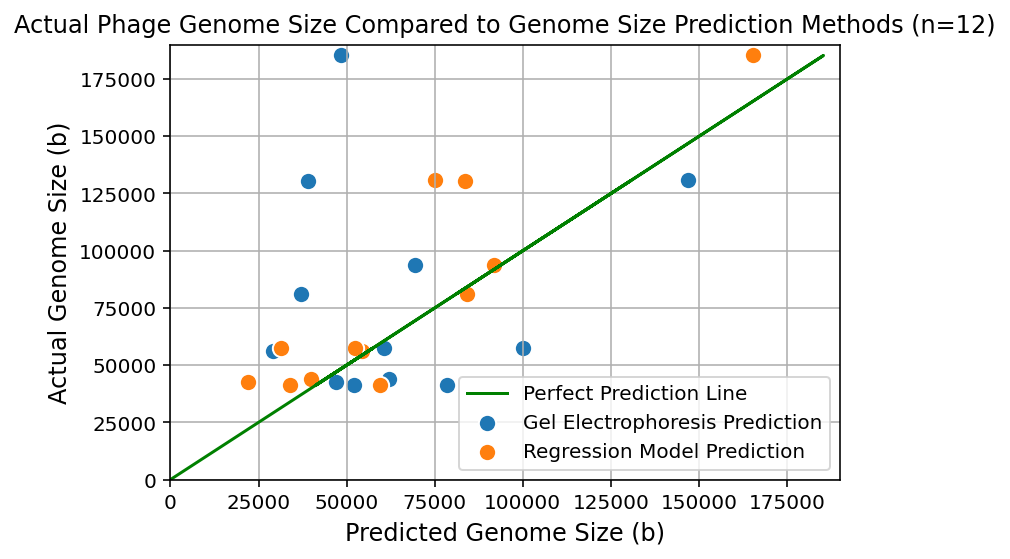

In [9]:
#Visualize data

import seaborn as sns 
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'


plt.scatter(gel_preds["Gel Estimation"], gel_preds["Genome Size"],edgecolors='w', s=75, label = "Gel Electrophoresis Prediction")

p = np.polyfit(np.log10(valids["volume"]),valids["Genome Size"], 1)
y_fit = (np.polyval(p, np.log10(gel_preds["volume"])))


plt.scatter( y_fit, gel_preds["Genome Size"],edgecolors='w' , s=75, label = "Regression Model Prediction")

x = [0]
x.extend(list(gel_preds["Genome Size"]))
plt.plot(x, x, c = 'g', label = "Perfect Prediction Line")
plt.xlim([0, 190000])
plt.ylim([0, 190000])

plt.grid()

plt.legend()

plt.title('Actual Phage Genome Size Compared to Genome Size Prediction Methods (n=12)', fontsize=12)

plt.ylabel('Actual Genome Size (b)', fontsize=12)

plt.xlabel('Predicted Genome Size (b)', fontsize=12)


Text(0.5, 0, 'Genome Size Prediction Method')

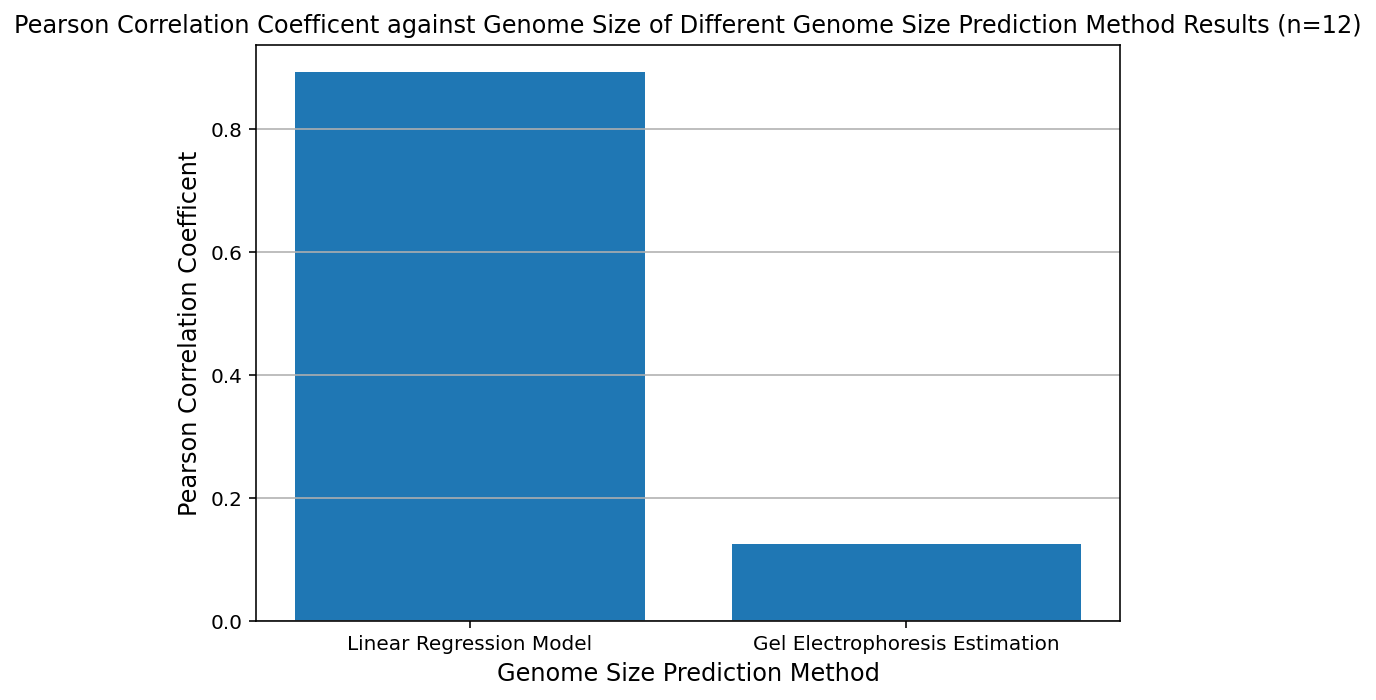

In [10]:
#Compute and Graph Correlation Coefficents

new_arr = []
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(gel_preds["Genome Size"], y_fit)
new_arr.append(r_value)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(gel_preds["Genome Size"], gel_preds["Gel Estimation"])
new_arr.append(r_value)

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(['Linear Regression Model', "Gel Electrophoresis Estimation"],new_arr)
plt.grid(axis='y')
plt.title('Pearson Correlation Coefficent against Genome Size of Different Genome Size Prediction Method Results (n=12)', fontsize=12)

plt.ylabel('Pearson Correlation Coefficent', fontsize=12)

plt.xlabel('Genome Size Prediction Method', fontsize=12)


In [11]:
#Estimate Lutharis Genome Size Given Estimated Volume in nm^3

(np.polyval(p, np.log10([68476.069])))


array([67115.66430593])